In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import platform


In [23]:
data = pd.read_csv('./new/total_data.csv')
data.head(5)

,계절,월,일,요일,공휴일,성별,연령대,대분류명,소분류명,평균일강수량(mm),평균풍속(km/h),평균습도(%rh),일조합,체감온도(℃),일 미세먼지 농도(㎍/㎥),10만건당 건수,구매건수
0,겨울,1,1,0,1.0,F,20,식품,가공란,0.0,6.84,51.0,8.7,-2.810026,32.962963,0.480964,37
1,겨울,1,1,0,1.0,F,30,식품,가공란,0.0,6.84,51.0,8.7,-2.810026,32.962963,0.480964,16
2,겨울,1,1,0,1.0,F,40,식품,가공란,0.0,6.84,51.0,8.7,-2.810026,32.962963,0.480964,9
3,겨울,1,1,0,1.0,F,50,식품,가공란,0.0,6.84,51.0,8.7,-2.810026,32.962963,0.480964,3
4,겨울,1,1,0,1.0,M,20,식품,가공란,0.0,6.84,51.0,8.7,-2.810026,32.962963,0.480964,13


In [25]:
beauty = data[data['대분류명']=='뷰티'].reset_index(drop=True)
print(beauty.shape)
beauty.head(5)

(697853, 17)


,계절,월,일,요일,공휴일,성별,연령대,대분류명,소분류명,평균일강수량(mm),평균풍속(km/h),평균습도(%rh),일조합,체감온도(℃),일 미세먼지 농도(㎍/㎥),10만건당 건수,구매건수
0,겨울,1,1,0,1.0,F,20,뷰티,기능성 링클케어 화장품,0.0,6.84,51.0,8.7,-2.810026,32.962963,12.154295,2
1,겨울,1,1,0,1.0,F,40,뷰티,기능성 링클케어 화장품,0.0,6.84,51.0,8.7,-2.810026,32.962963,12.154295,1
2,겨울,1,1,0,1.0,F,20,뷰티,기능성 모공관리 화장품,0.0,6.84,51.0,8.7,-2.810026,32.962963,36.000828,7
3,겨울,1,1,0,1.0,F,30,뷰티,기능성 모공관리 화장품,0.0,6.84,51.0,8.7,-2.810026,32.962963,36.000828,3
4,겨울,1,1,0,1.0,F,40,뷰티,기능성 모공관리 화장품,0.0,6.84,51.0,8.7,-2.810026,32.962963,36.000828,1


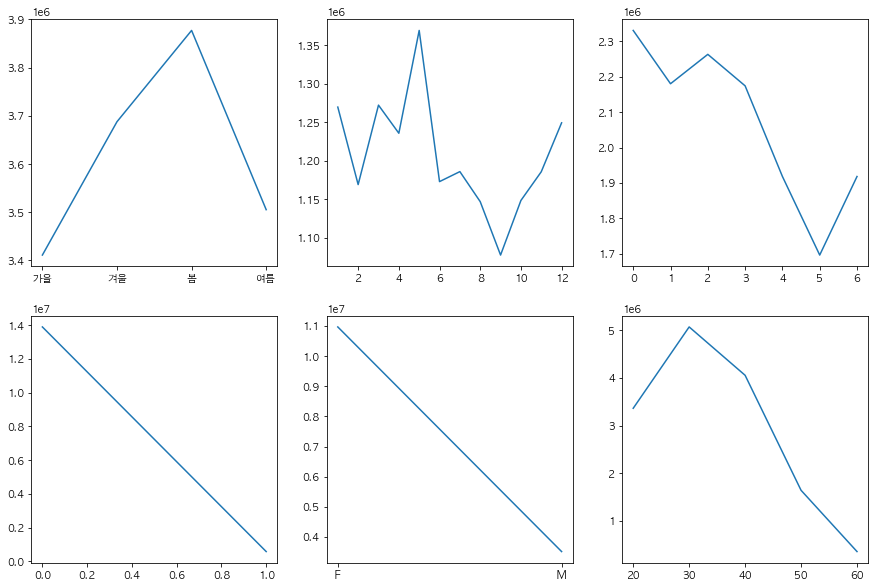

In [26]:
# 계절, 월, 요일, 공휴일, 성별, 연령대에 따른 구매건수 합계
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False        
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.plot(beauty.groupby('계절')['구매건수'].sum())

plt.subplot(232)
plt.plot(beauty.groupby('월')['구매건수'].sum())

plt.subplot(233)
plt.plot(beauty.groupby('요일')['구매건수'].sum())

plt.subplot(234)
plt.plot(beauty.groupby('공휴일')['구매건수'].sum())

plt.subplot(235)
plt.plot(beauty.groupby('성별')['구매건수'].sum())

plt.subplot(236)
plt.plot(beauty.groupby('연령대')['구매건수'].sum())

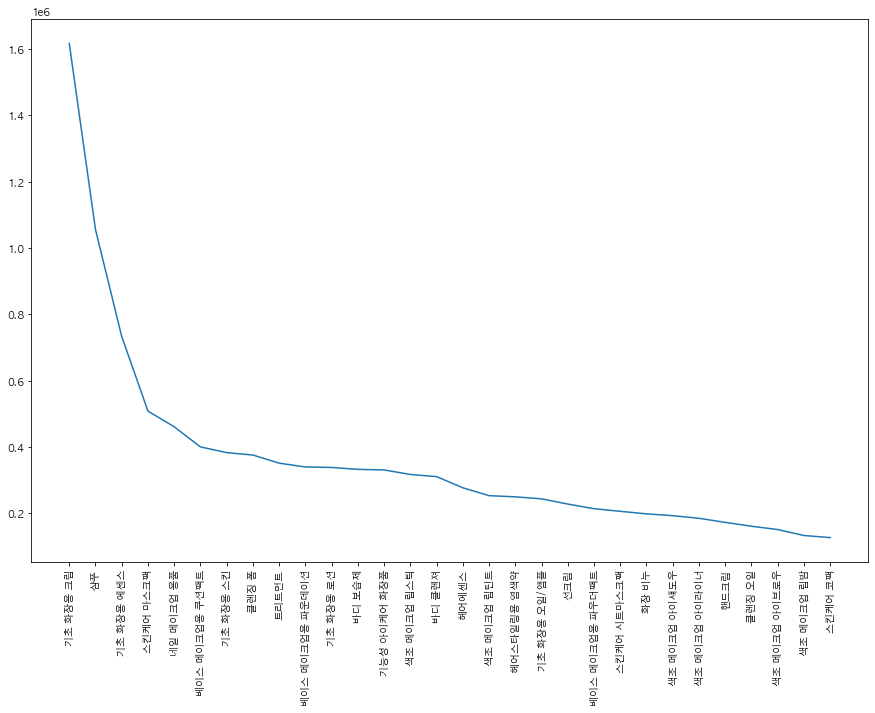

In [27]:
# 소분류에 따른 구매건수 합계
구매합계 = beauty.groupby('소분류명')['구매건수'].sum()
plt.figure(figsize=(15,10))
plt.plot(구매합계.sort_values(ascending=False)[:30])
plt.xticks(rotation=90)
plt.show()

In [49]:
#계절
봄 = beauty[beauty['계절']=='봄'].reset_index(drop=True)
여름 = beauty[beauty['계절']=='여름'].reset_index(drop=True)
가을 = beauty[beauty['계절']=='가을'].reset_index(drop=True)
겨울 = beauty[beauty['계절']=='겨울'].reset_index(drop=True)


In [50]:
봄.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '기초 화장용 에센스', '스킨케어 마스크팩', '베이스 메이크업용 쿠션팩트',
       '네일 메이크업 용품', '베이스 메이크업용 파운데이션', '클렌징 폼', '기초 화장용 스킨', '선크림'],
      dtype='object', name='소분류명')

In [51]:
여름.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '네일 메이크업 용품', '기초 화장용 에센스', '스킨케어 마스크팩',
       '베이스 메이크업용 쿠션팩트', '클렌징 폼', '기초 화장용 스킨', '트리트먼트', '바디 클렌져'],
      dtype='object', name='소분류명')

In [52]:
가을.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '기초 화장용 에센스', '스킨케어 마스크팩', '기초 화장용 스킨', '바디 보습제',
       '클렌징 폼', '기능성 아이케어 화장품', '기초 화장용 로션', '베이스 메이크업용 쿠션팩트'],
      dtype='object', name='소분류명')

In [53]:
겨울.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '기초 화장용 에센스', '스킨케어 마스크팩', '기초 화장용 로션', '기초 화장용 스킨',
       '기능성 아이케어 화장품', '바디 보습제', '색조 메이크업 립스틱', '트리트먼트'],
      dtype='object', name='소분류명')

In [54]:
#성별
여성 = beauty[beauty['성별']=='F'].reset_index(drop=True)
남성 = beauty[beauty['성별']=='M'].reset_index(drop=True)


In [55]:
여성.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '기초 화장용 에센스', '스킨케어 마스크팩', '네일 메이크업 용품',
       '베이스 메이크업용 쿠션팩트', '기초 화장용 스킨', '베이스 메이크업용 파운데이션', '트리트먼트',
       '색조 메이크업 립스틱'],
      dtype='object', name='소분류명')

In [56]:
남성.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '기초 화장용 에센스', '클렌징 폼', '스킨케어 마스크팩', '기초 화장용 로션',
       '바디 클렌져', '기초 화장용 스킨', '바디 보습제', '네일 메이크업 용품'],
      dtype='object', name='소분류명')

In [64]:
#연령대
two = beauty[beauty['연령대']==20].reset_index(drop=True)
three = beauty[beauty['연령대']==30].reset_index(drop=True)
four = beauty[beauty['연령대']==40].reset_index(drop=True)
five = beauty[beauty['연령대']==50].reset_index(drop=True)
six = beauty[beauty['연령대']==60].reset_index(drop=True)

In [59]:
two.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '기초 화장용 에센스', '스킨케어 마스크팩', '네일 메이크업 용품', '기초 화장용 스킨',
       '색조 메이크업 립스틱', '베이스 메이크업용 파운데이션', '색조 메이크업 립틴트', '클렌징 폼'],
      dtype='object', name='소분류명')

In [60]:
three.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '기초 화장용 에센스', '네일 메이크업 용품', '스킨케어 마스크팩',
       '베이스 메이크업용 쿠션팩트', '클렌징 폼', '기초 화장용 로션', '기초 화장용 스킨', '바디 보습제'],
      dtype='object', name='소분류명')

In [61]:
four.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '기초 화장용 에센스', '스킨케어 마스크팩', '베이스 메이크업용 쿠션팩트',
       '기능성 아이케어 화장품', '트리트먼트', '네일 메이크업 용품', '클렌징 폼', '기초 화장용 스킨'],
      dtype='object', name='소분류명')

In [62]:
five.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '기초 화장용 에센스', '스킨케어 마스크팩', '트리트먼트', '기능성 아이케어 화장품',
       '헤어스타일링용 염색약', '베이스 메이크업용 쿠션팩트', '클렌징 폼', '기초 화장용 스킨'],
      dtype='object', name='소분류명')

In [65]:
six.groupby('소분류명')['구매건수'].sum().sort_values(ascending=False)[:10].index

Index(['기초 화장용 크림', '샴푸', '기초 화장용 에센스', '스킨케어 마스크팩', '헤어스타일링용 염색약',
       '기능성 아이케어 화장품', '트리트먼트', '기초 화장용 로션', '클렌징 폼', '기초 화장용 스킨'],
      dtype='object', name='소분류명')

In [67]:
# 체감온도가 높을 때
beauty.sort_values(by=['체감온도(℃)','구매건수'], ascending=False)[:100]['소분류명'].unique()

array(['기초 화장용 에센스', '기초 화장용 크림', '기초 화장용 스킨', '스킨케어 마스크팩',
       '베이스 메이크업용 파우더팩트', '샴푸', '네일 메이크업 용품', '베이스 메이크업용 쿠션팩트', '트리트먼트',
       '색조 메이크업 아이라이너', '색조 메이크업 립스틱', '색조 메이크업 립틴트', '베이스 메이크업용 파운데이션',
       '클렌징 폼', '선크림', '바디 클렌져', '기능성 아이케어 화장품', '화장 비누', '바디 보습제',
       '기초 화장용 로션', '헤어스타일링용 염색약', '색조 메이크업 아이섀도우', '스킨케어 코팩', '선케어용 선밤',
       '색조 메이크업 아이브로우', '헤어에센스', '색조 메이크업 볼터치', '스킨케어 시트마스크팩',
       '기초 화장용 미스트', '메이크업 브러쉬'], dtype=object)

In [68]:
# 체감온도가 낮을 때
beauty[beauty['체감온도(℃)'] <= np.mean(beauty['체감온도(℃)'])].sort_values(by='구매건수', ascending=False)[:100]['소분류명'].unique()

array(['기초 화장용 에센스', '스킨케어 수면팩', '기초 화장용 크림', '샴푸', '베이스 메이크업용 메이크업베이스',
       '네일 메이크업 용품', '클렌징 폼'], dtype=object)

In [69]:
# 미세먼지가 많을 때
beauty.sort_values(by=['일 미세먼지 농도(㎍/㎥)','구매건수'], ascending=False)[:100]['소분류명'].unique()

array(['기초 화장용 크림', '샴푸', '스킨케어 마스크팩', '기능성 아이케어 화장품', '기초 화장용 에센스',
       '네일 메이크업 용품', '기초 화장용 스킨', '클렌징 폼', '트리트먼트', '색조 메이크업 립틴트',
       '기초 화장용 로션', '스킨케어 시트마스크팩', '바디 보습제', '헤어에센스', '베이스 메이크업용 파운데이션',
       '헤어스타일링용 염색약', '베이스 메이크업용 쿠션팩트', '색조 메이크업 립스틱', '색조 메이크업 아이섀도우',
       '선크림', '색조 메이크업 아이라이너', '뷰티 화장솜', '바디 클렌져', '기초 화장용 오일/앰플',
       '클렌징 오일', '색조 메이크업 아이브로우', '기초 화장용 미스트', '화장 비누', '스크럽/필링크림',
       '클렌징 워터/젤', '핸드크림', '색조 메이크업 마스카라', '핸드워시/스크럽', '베이스 메이크업용 파우더팩트'],
      dtype=object)

In [70]:
# 미세먼지가 적을 때
beauty[beauty['일 미세먼지 농도(㎍/㎥)'] <= np.mean(beauty['일 미세먼지 농도(㎍/㎥)'])].sort_values(by='구매건수', ascending=False)[:100]['소분류명'].unique()

array(['스킨케어 수면팩', '베이스 메이크업용 쿠션팩트', '스킨케어 마스크팩', '기초 화장용 에센스',
       '기초 화장용 크림', '샴푸', '네일 메이크업 용품', '기능성 아이케어 화장품', '클렌징 폼',
       '베이스 메이크업용 파우더팩트'], dtype=object)